In [ ]:
# riboswitch and ribosnitch strategy ------

In [7]:
from utils_analysis import run_BMM_v2,run_2sample_clustering_analysis, get_flip_order, plot_inferred_proportions, plot_predicted_cluster_profile_3_NEW 
from bmm_numba import BMMsNumba
from method_bmm_numba import BMMsNumba 

In [ ]:
## 1. Figure_2a --------------------

In [8]:
def run_global_analysis_mod_flt_0(p_genes, p_clusters, p_start=None, p_end=None, p_min_samples=1000, p_local=False, p_seed=386, p_method="dtw",p_prop=None):
    
    if p_method == "dtw":       
        
        f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/"
        f_mtxs = [f_dir + "Noligand/ADD-TRUNC_binary.mtx",
                  f_dir + "Ligand/ADD-TRUNC_binary.mtx"]
        f_ids = [f_dir + "Noligand/ADD-TRUNC_binary.iids.gz",
                 f_dir + "Ligand/ADD-TRUNC_binary.iids.gz"]

    
    f_sizes = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/reference_of_ribosxitch_v2.sizes"

    if p_start is not None and p_end is not None:
        p_length = None
    else:
        p_length = -1
    
    results  = run_2sample_clustering_analysis(f_mtxs, f_ids, p_genes, f_sizes, 
                                                p_depth=-1, p_length=p_length, p_start=p_start, p_end=p_end, 
                                                p_threshold_len_prop=0.85, p_verbose=True, 
                                                f_likelihood=None, p_clusters=p_clusters,
                                                p_no_of_runs=1,
                                                p_threshold=0.5,  #0.5, #0.0001,
                                                p_min_iters=20, #20 #300,
                                                p_seed=p_seed,
                                                p_min_samples=p_min_samples,
                                                p_unknown=0.00, 
                                                p_pos_modrate_low=0.0, p_pos_modrate_high=1.0,
                                                p_read_modrate_low=0.0075, p_read_modrate_high=0.025,
                                                p_visualize=True, p_impute=False, p_local=p_local,p_prop=p_prop)
    return results



def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes

### 2 sample clusters

def BMM_plots_truncate_specific_mod_0(gene1, gene2,start,end,p_min_samples,prop):

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = start, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)                                                   
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW(new_X, results, params,"/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/") 

(1474370, 3)
1474370
(1084747, 3)
1084747
25 175 1014188 755881
755881
(1187955, 150)
(755881, 150)
(755881, 150)
(1474370, 3)
1474370
(1084747, 3)
1084747
0 198 1014188 755881
755881
(1304057, 198)
(755881, 198)
(755881, 198)
(281435, 150) (259165, 150)
(281435, 150) (259165, 150)
(1000, 150) (1000, 150)
Current Run: 0
Best Model - Run 0
[[73.72340426 28.96226415]
 [26.27659574 71.03773585]]
[[28.96226415 71.03773585]
 [73.72340426 26.27659574]]
28.962264150943394 28.962264150943394 0.5
71.0377358490566 100.0 0.5
73.72340425531915 73.72340425531915 1.5
26.276595744680854 100.0 1.5
2000
WT: 940 | MT: 1060 | UN: 0
UN WT: 0 | UN MT: 0
(693, 198)
(247, 198)
(753, 198)
(307, 198)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/utils_analysis.py:5417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/utils_analysis.py:5418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/utils_analysis.py:5419: SettingWit

(693, 198)
(247, 198)
(753, 198)
(307, 198)
Counter({True: 693, False: 247})
Counter({True: 753, False: 307})
0.723
(693, 198)
(247, 198)
(753, 198)
(307, 198)
0.9628139503499988
0.6226244736824911
0.6049897348509446
0.24715457969132382
0.953419821803591
0.8452010068124881
0.8813293948213934
0.14318773531471374


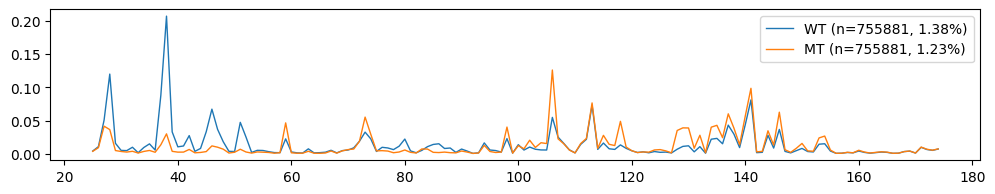

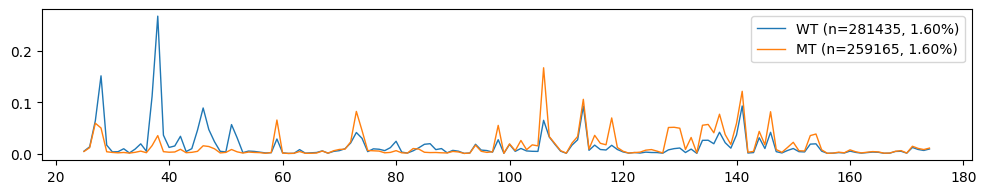

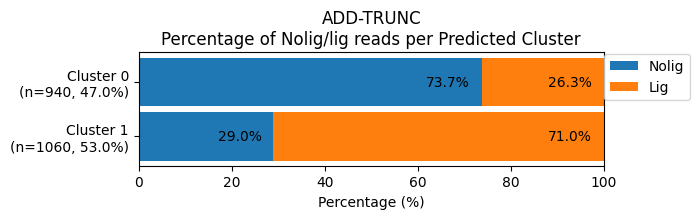

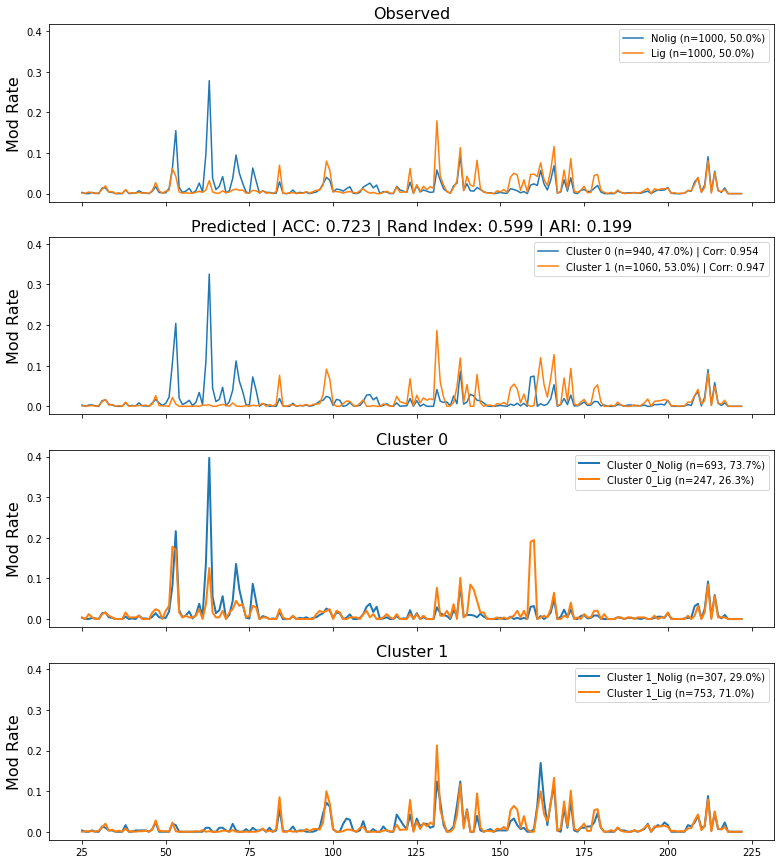

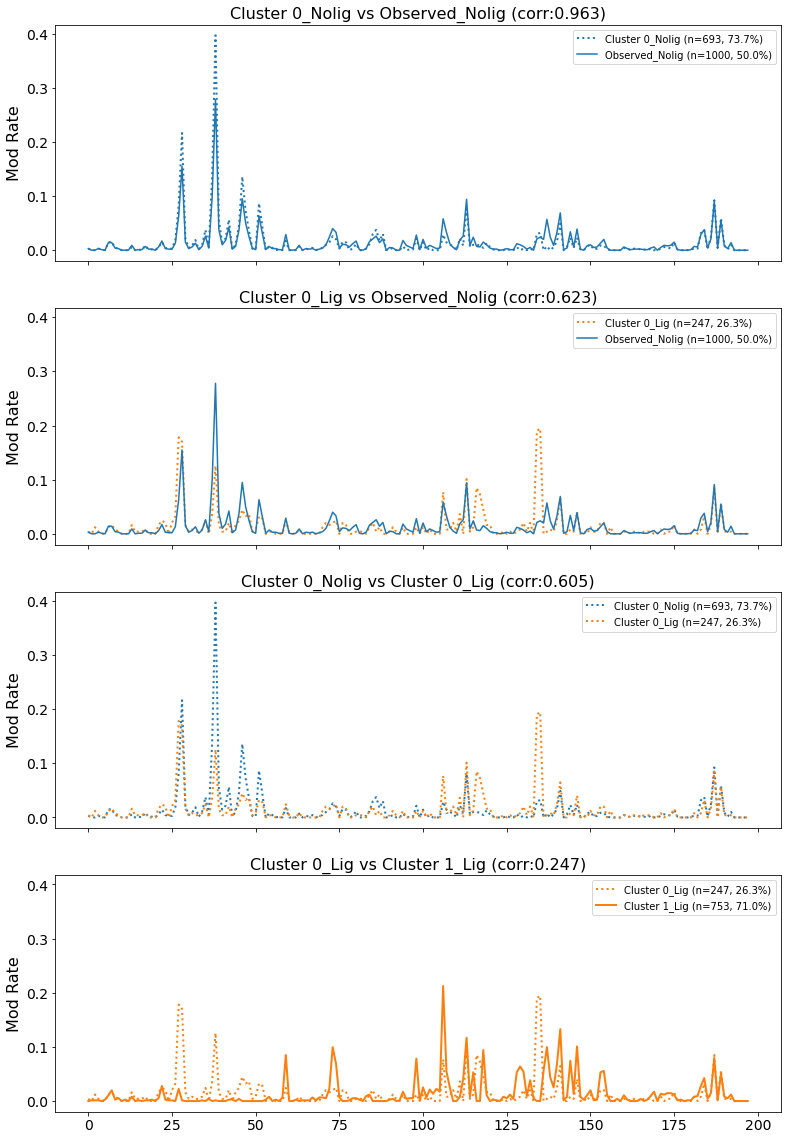

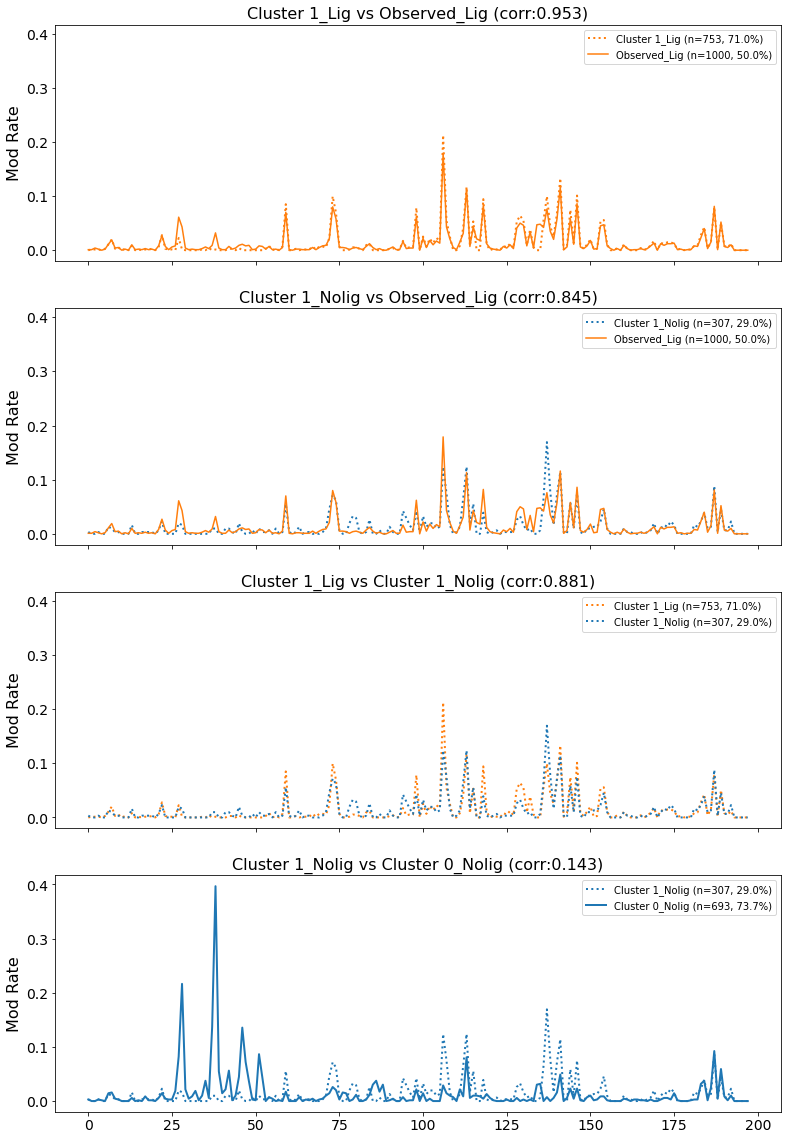

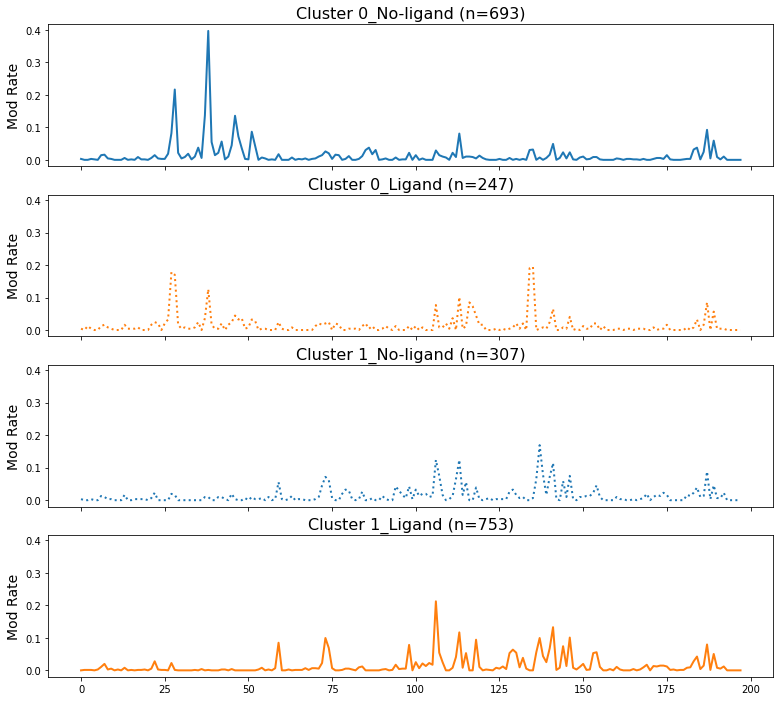

In [9]:
BMM_plots_truncate_specific_mod_0("ADD-TRUNC", "ADD-TRUNC",25,175,1000,0.5)  